In [1]:
from lsmulator import *
from workloads import *
import numpy as np
import matplotlib.pyplot as plt
from figure_grid import *

# Optimization

In [2]:
zipfs = [ZipfWorkload(zipf_param=1.1),
         ZipfWorkload(zipf_param=1.25),
         ZipfWorkload(zipf_param=1.5)]

In [21]:
timedecs = [DiscoverDecayWorkload(),
            DiscoverDecayWorkload(discoveries=scipy.stats.poisson(5)),
            DiscoverDecayWorkload(decay_rate=scipy.stats.beta(10, 1)),
            DiscoverDecayWorkload(decay_rate=scipy.stats.beta(1, 1))]

In [3]:
robins = [RoundRobinWorkload()]

In [28]:
def optimize(workload, total_memory):
  lsmtree = lsmulate(workload.queries)
  nlayers = len(lsmtree.layers())
  trees = []
  for i in range(total_memory):
    cache_size = i
    bloom_size = total_memory - i
    bloom_per = int(bloom_size/(5*nlayers))
    if bloom_per:
      bloom_func = lambda l: (bloom_per, 5) # TODO: select ideal hash function count
      tree = lsmulate(workload.queries, cache_size=i, bloom_size=bloom_func)
      trees.append(tree)
  return trees

In [29]:
trees = optimize(zipfs[2], 100)

In [31]:
trees2 = optimize(zipfs[0], 100)

In [33]:
trees3 = optimize(timedecs[0], 100)

In [35]:
trees4 = optimize(robins[0], 100)

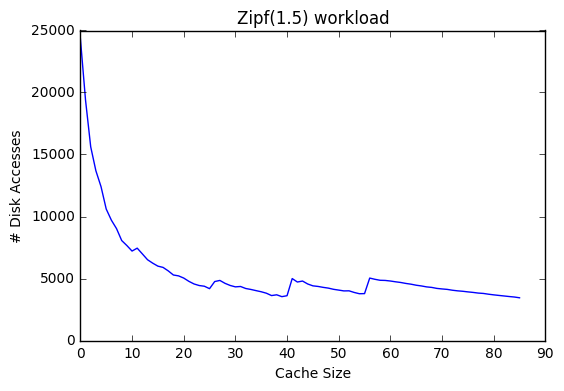

In [30]:
plt.title('Zipf(1.5) workload')
plt.plot([t.cache.size for t in trees], [t.disk_accesses() for t in trees])
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.show()

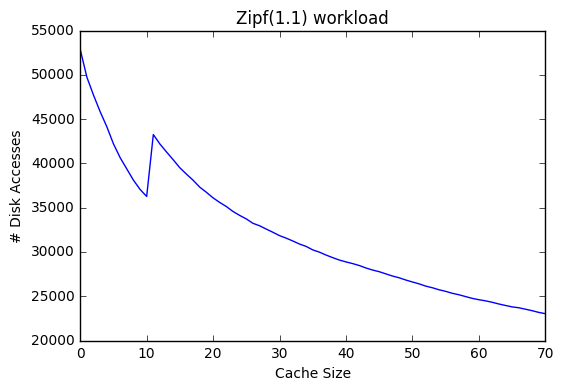

In [32]:
plt.title('Zipf(1.1) workload')
plt.plot([t.cache.size for t in trees2], [t.disk_accesses() for t in trees2])
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.show()

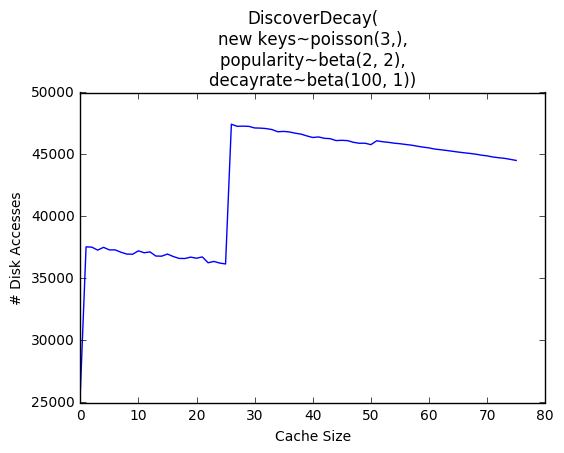

In [34]:
plt.title(timedecs[0].__str__())
plt.plot([t.cache.size for t in trees3], [t.disk_accesses() for t in trees3])
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.show()

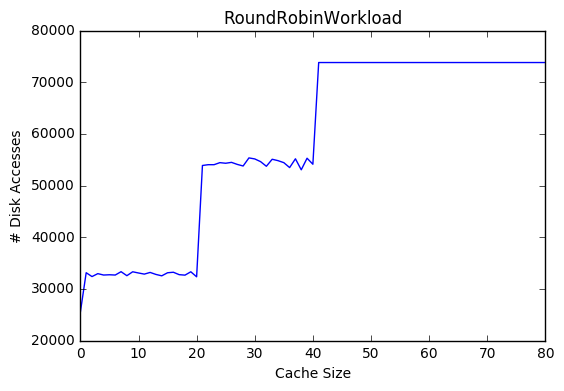

In [36]:
plt.title(robins[0].__str__())
plt.plot([t.cache.size for t in trees4], [t.disk_accesses() for t in trees4])
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.show()

In [26]:
lsmulate(timedecs[0].queries, bloom_size=lambda l: (100, 10)).disk_accesses()

16285

In [27]:
lsmulate(timedecs[0].queries, bloom_size=lambda l: (100, 1)).disk_accesses()

41943